# A/B hackathon

Цель А/Б теста: выяснить какая модель расчёта ставки является более эффективной. 

Нулевая гипотеза: нет статистически значимой разницы для бизнеса при использовании различных моделей ставки 

Альтернативная гипотеза: статистически значимая разница для бизнеса существует 

Целевые метрики: Clicks on Website per spent dollar 

Экспериментальная группа: "Средняя ставка" 

Контрольная группа: "Максимальная ставка" 

Уровень статистической значимости 0,05 

Параметры эксперимента:
* Размер выборки: 29
* Факторы воздействия:
    * Количество потраченных средств
    * 
* Длительность эсперимента: 30 дней



## Импорт библиотек

In [1]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install scipy
# ! pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import kstest

import seaborn as sns

In [3]:
sns.set(style="whitegrid")

## Импорт файлов, удаление пустой колонки в контрольной группе и соответствующей этому же числу в тестовой

In [4]:
test_df = pd.read_csv('test_group.csv')

In [5]:
test_df = test_df[test_df['Date'] != '5.08.2019']

In [6]:
test_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [7]:
test_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275
10,Test Campaign,11.08.2019,2420,83633,71286,3750,2893,2617,1075,668


In [8]:
control_df = pd.read_csv('control_group.csv')

In [9]:
control_df.dropna(inplace=True)

In [10]:
control_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
10,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


## Стоит отметить, что на тестовую группу ("среднюю ставку") потратили в абсолютном значении больше средств

In [11]:
test_df['Spend [USD]'].sum()

74595

In [12]:
control_df['Spend [USD]'].sum()

66818

In [13]:
test_df['# of Impressions'].sum()

2123249

In [14]:
control_df['# of Impressions'].sum()

3177233.0

## test_df analysis

Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное. pvalue = 0.0


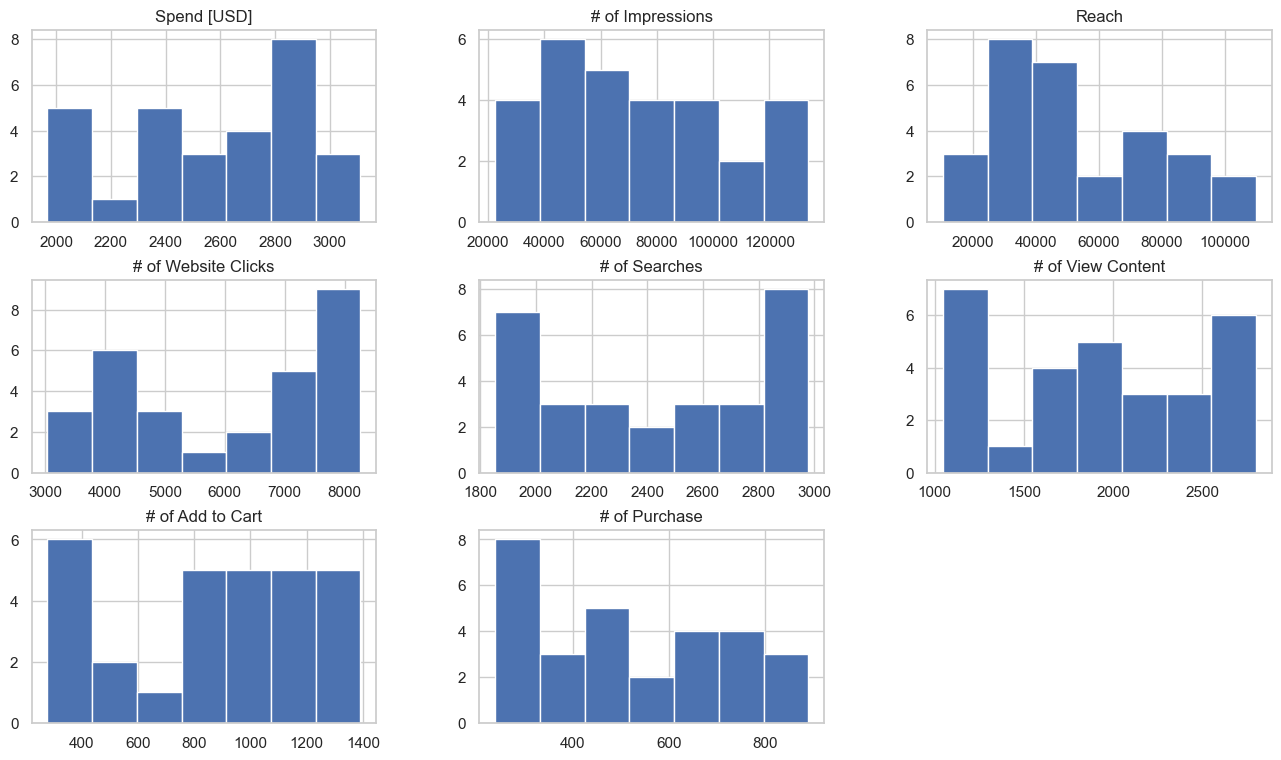

In [15]:
def hist_and_ktest(df, cut3 = False):
    df.hist(figsize=(16,9), bins = 7)

    def print_distribution_result(p_value, name):
        if p_value >= 0.001:
            print(f"Распределение данных в колонке '{name}' нормальное.", 'pvalue =', p_value)
        else:
            print(f"Нельзя сказать, что распределение у данных из колонки '{name}' нормальное.", 'pvalue =', p_value)
    if cut3:
        for colname in df.columns[2:]:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)
    else:
        for colname in df.columns:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)

hist_and_ktest(test_df, cut3 = True)


Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное. pvalue = 0.0


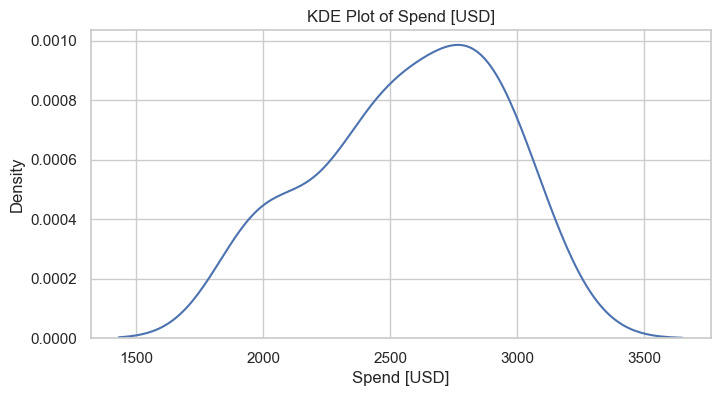

Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное. pvalue = 0.0


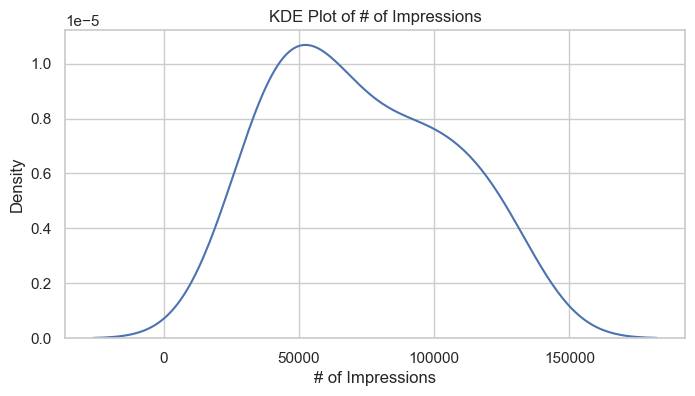

Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное. pvalue = 0.0


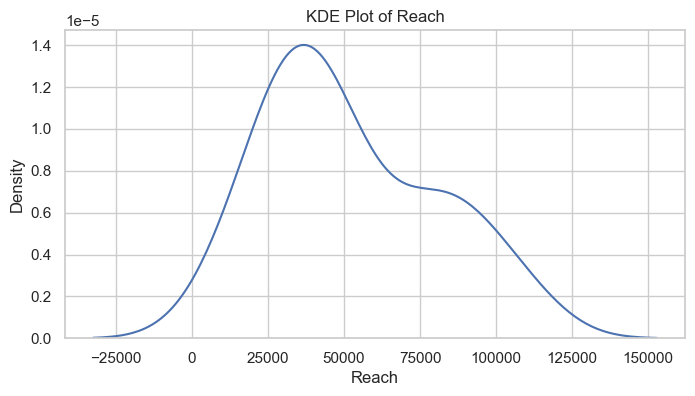

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное. pvalue = 0.0


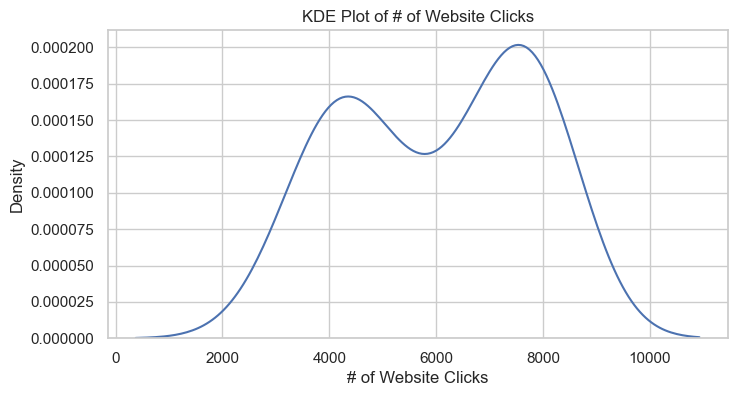

Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное. pvalue = 0.0


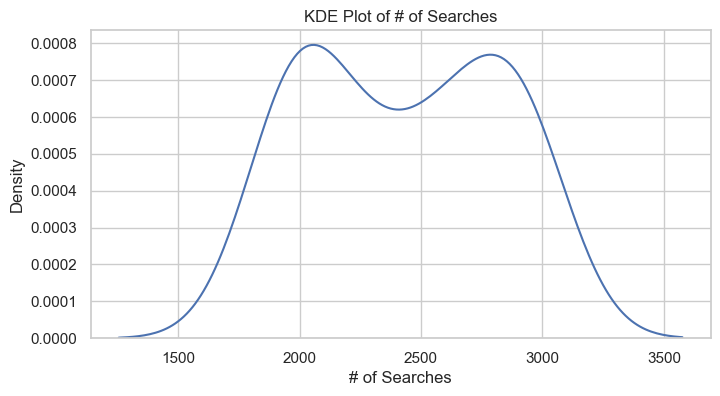

Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное. pvalue = 0.0


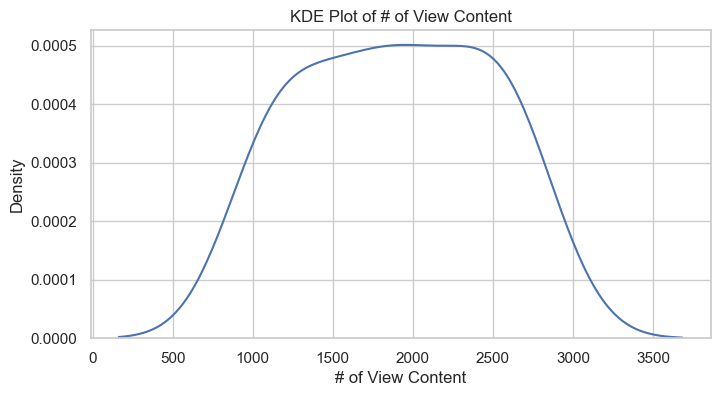

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное. pvalue = 0.0


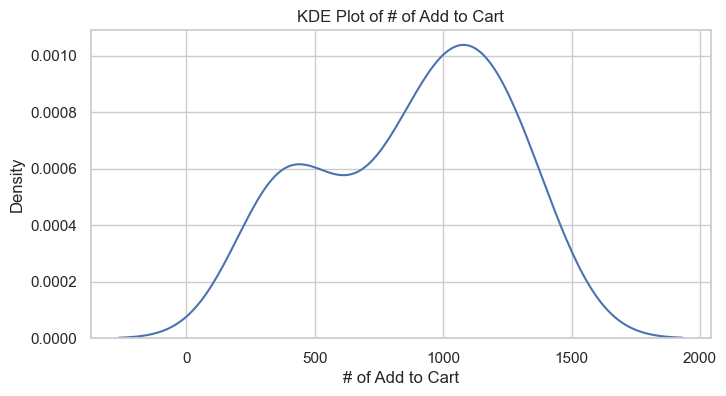

Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное. pvalue = 0.0


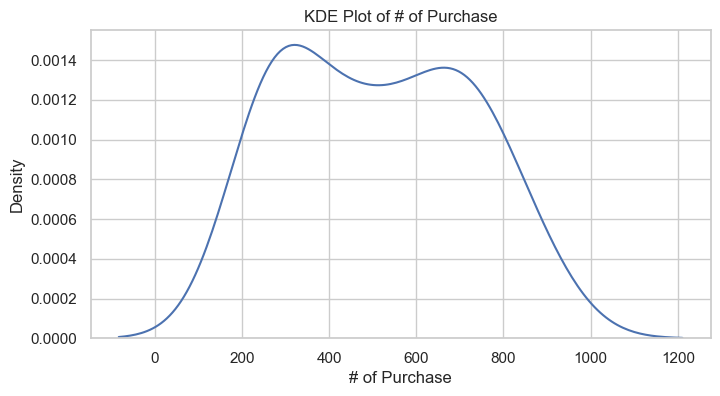

In [16]:
def kde_and_ktest(df, cut3 = False):
    def print_distribution_result(p_value, name):
        if p_value > 0.001:
            print(f"Распределение данных в колонке '{name}' нормальное.", 'pvalue =', p_value)
        else:
            print(f"Нельзя сказать, что распределение у данных из колонки '{name}' нормальное.", 'pvalue =', p_value)
    if cut3:
        for colname in df.columns[2:]:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)

            plt.figure(figsize=(8, 4))
            sns.kdeplot(data=df[colname])
            plt.title(f'KDE Plot of {colname}')
            plt.xlabel(colname)
            plt.ylabel('Density')
            plt.show()
    else:
        for colname in df.columns:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)

            plt.figure(figsize=(8, 4))
            sns.kdeplot(data=df[colname])
            plt.title(f'KDE Plot of {colname}')
            plt.xlabel(colname)
            plt.ylabel('Density')
            plt.show()
kde_and_ktest(test_df, cut3 = True)



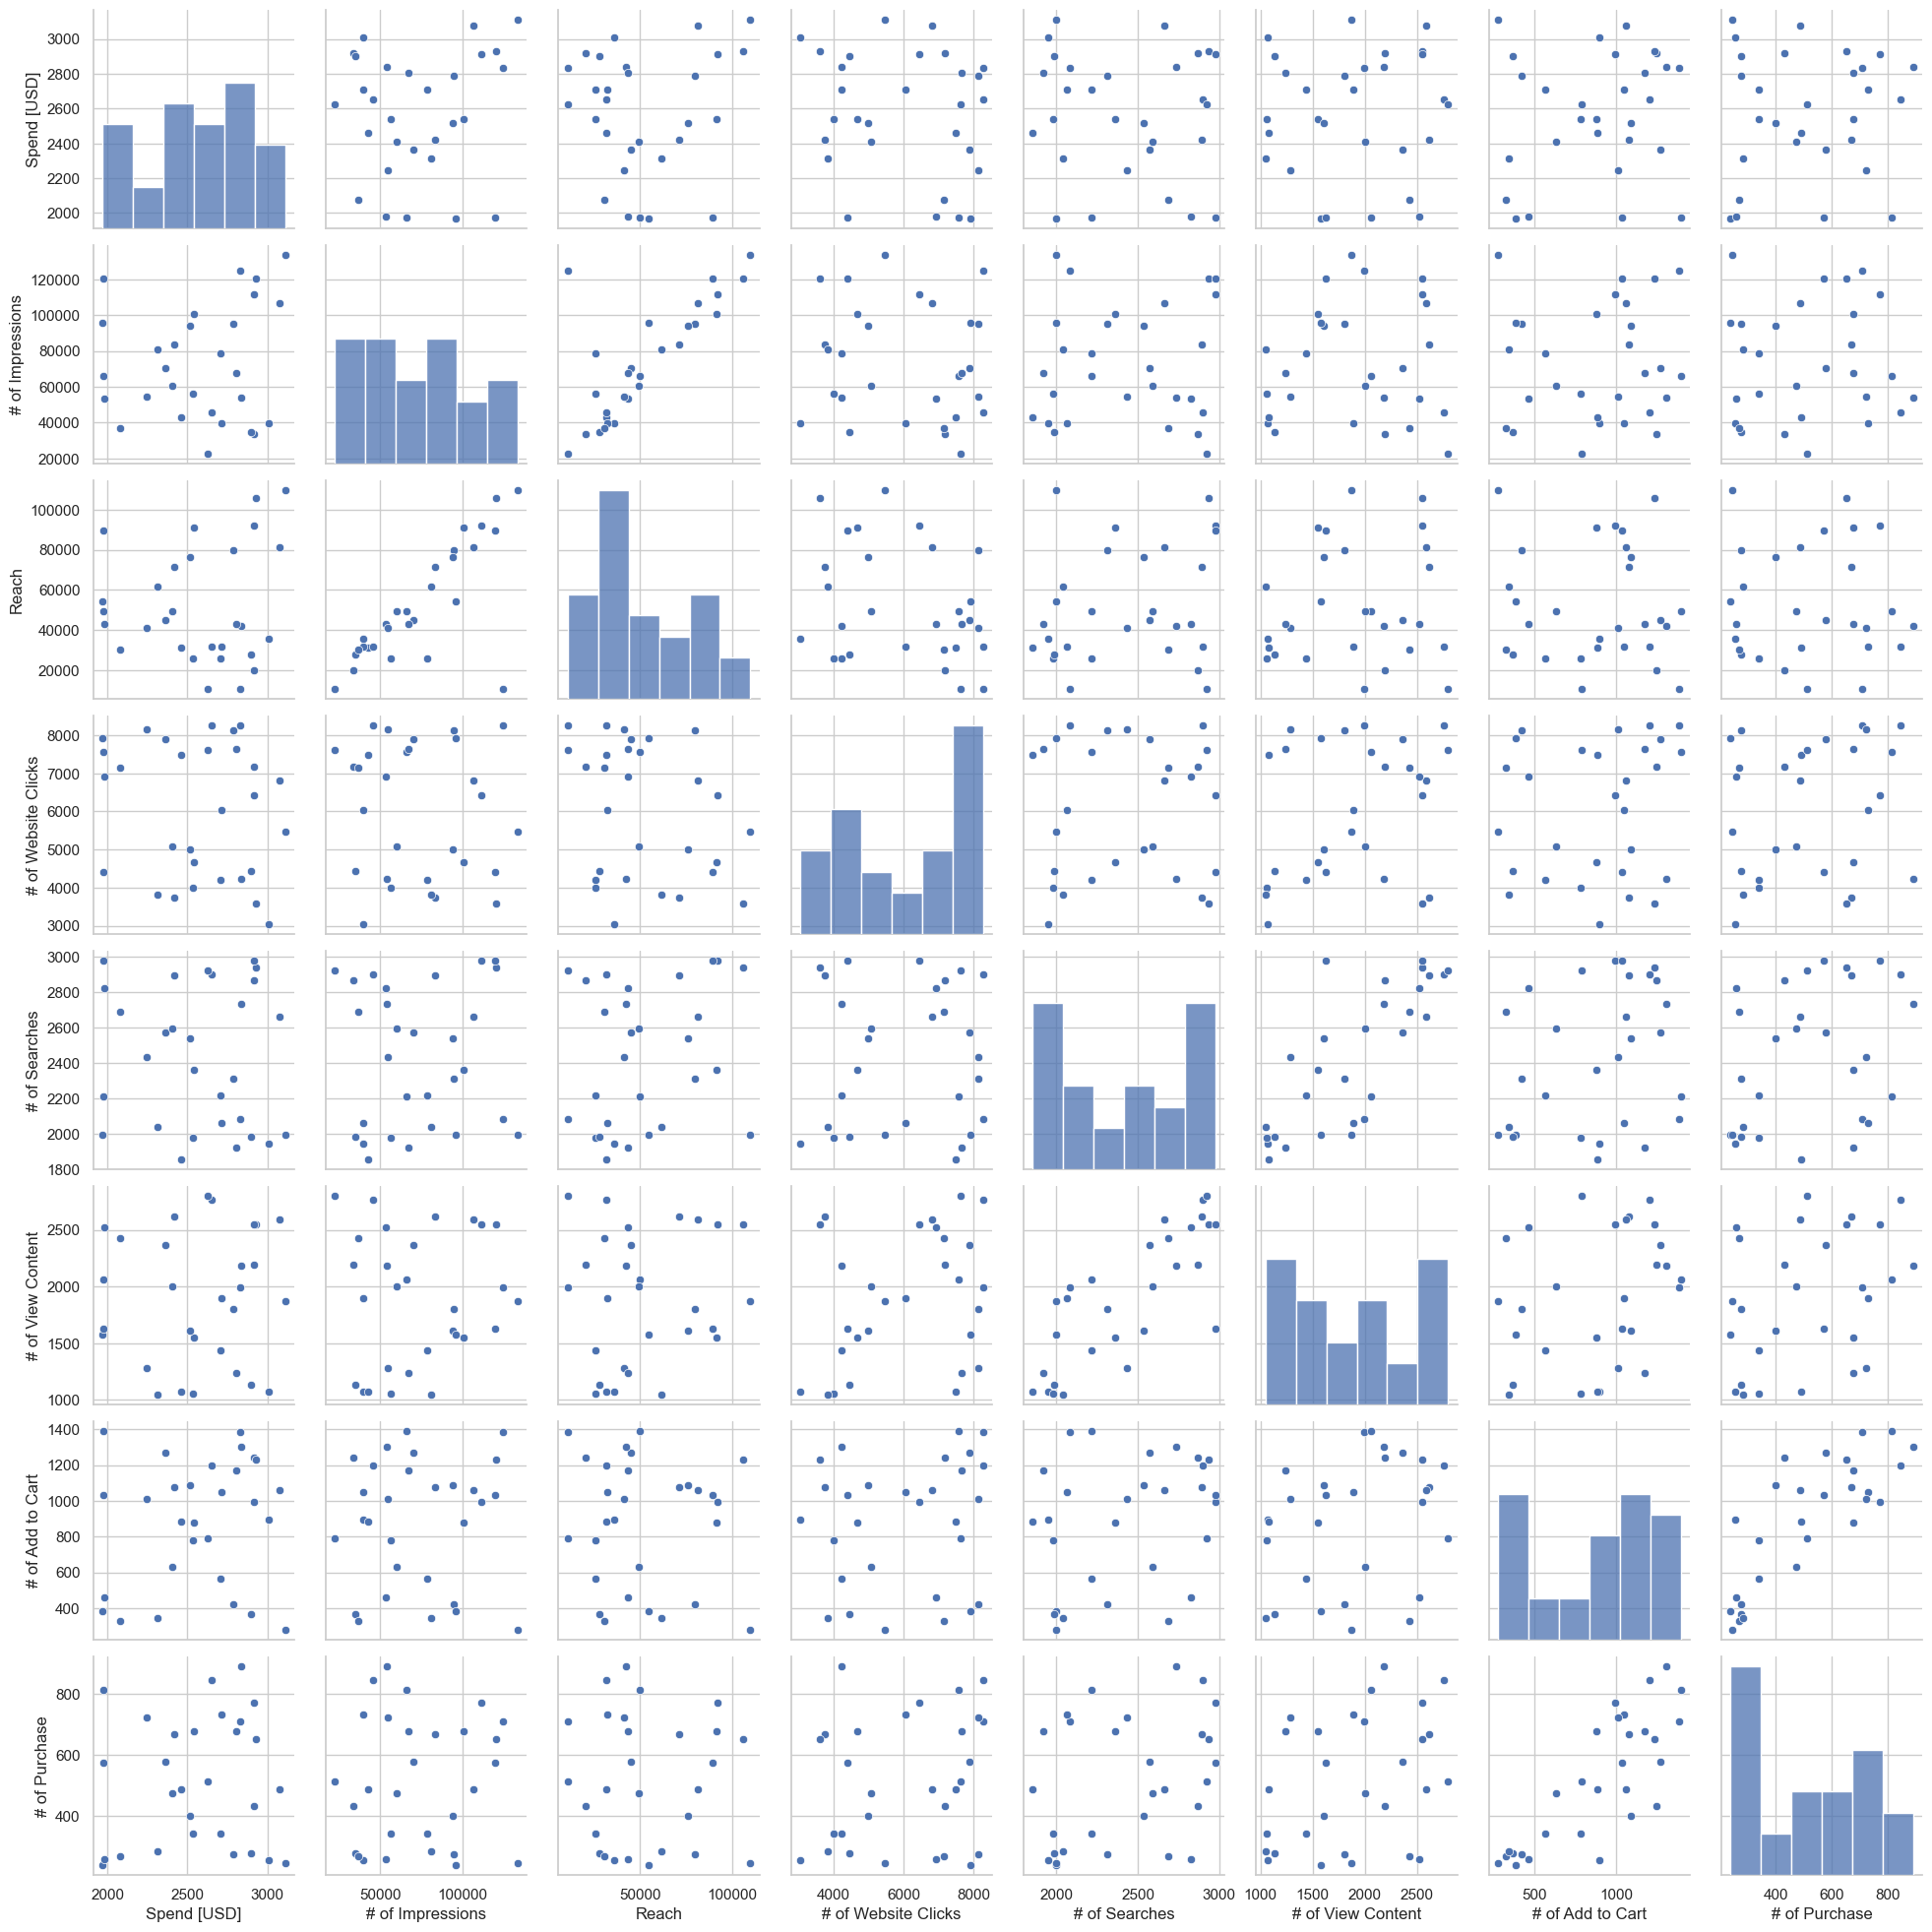

In [17]:
sns.pairplot(test_df)

### конверсию с каждого шага на другой можно определить по элементам ниже на один, чем главная диагональ (не знаю как назвать)

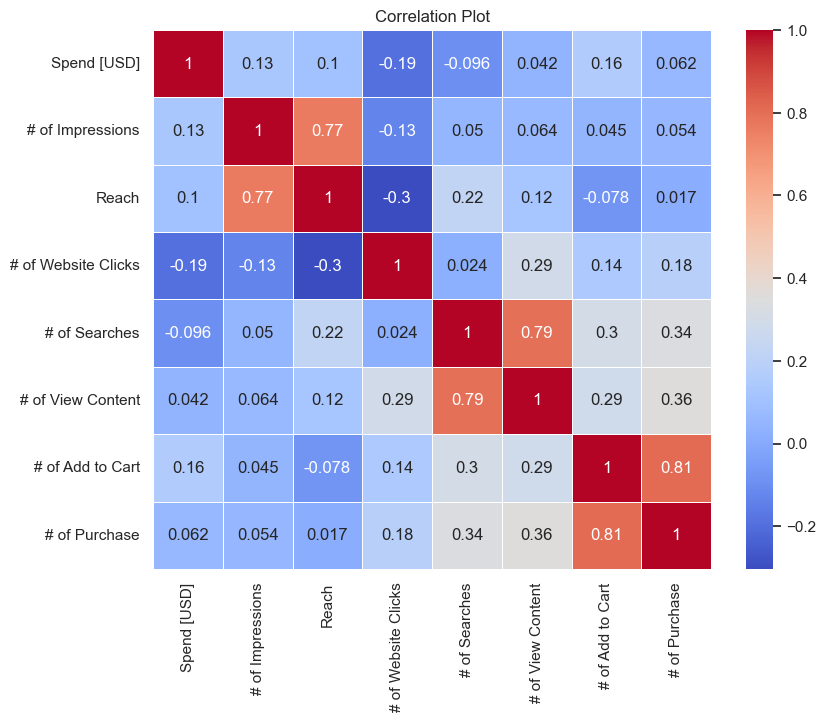

In [18]:
def draw_corr_matr(df, cut3 = False):
    if cut3:
        correlation_matrix = df.iloc[:,2:].corr(numeric_only=False)

    else:
        correlation_matrix = df.corr(numeric_only=False)

    plt.figure(figsize=(9, 7))

    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

    plt.title('Correlation Plot')
    plt.show()
    
draw_corr_matr(test_df, cut3 = True)


## control_df analysis

Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное. pvalue = 0.0


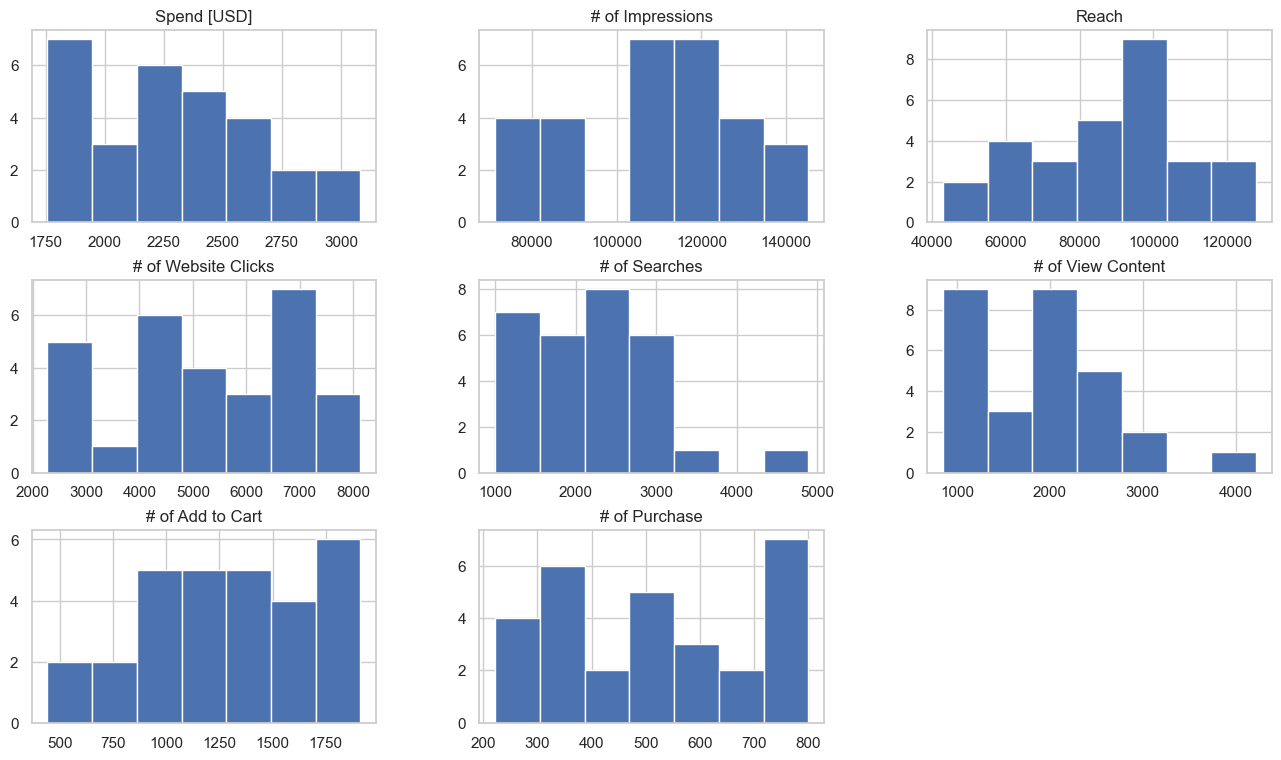

In [19]:
hist_and_ktest(control_df, cut3 = True)


Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное. pvalue = 0.0


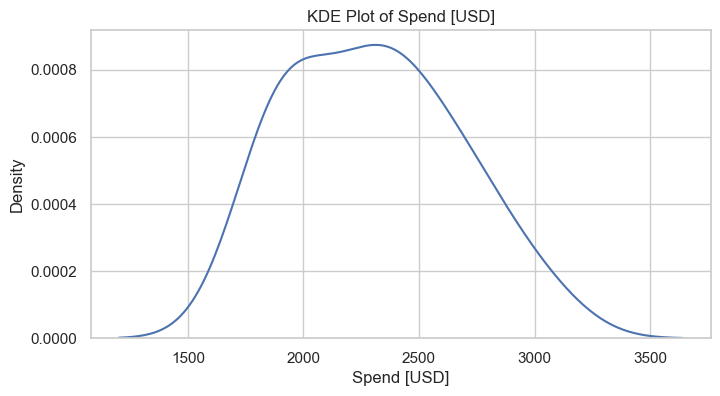

Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное. pvalue = 0.0


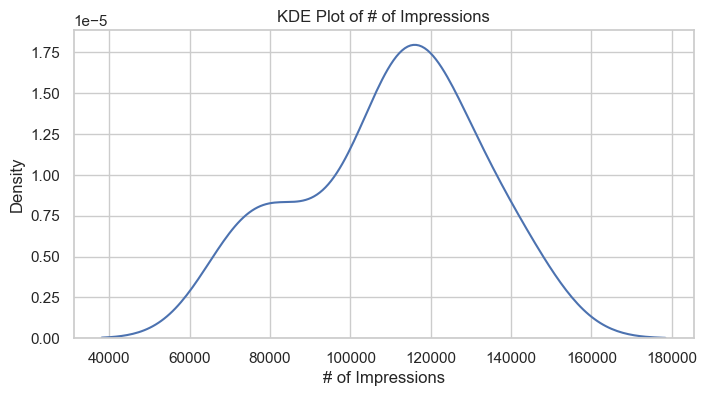

Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное. pvalue = 0.0


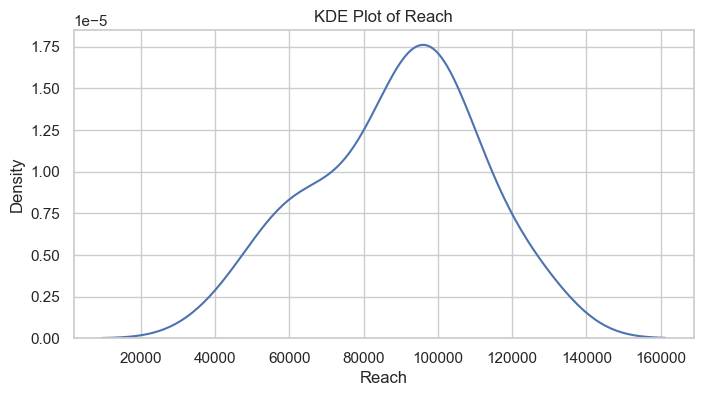

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное. pvalue = 0.0


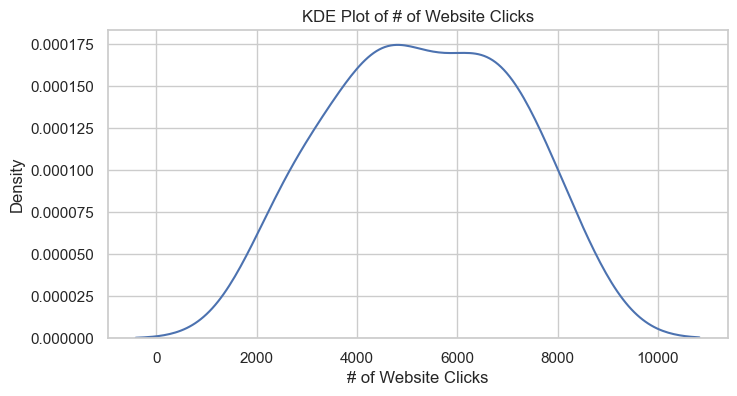

Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное. pvalue = 0.0


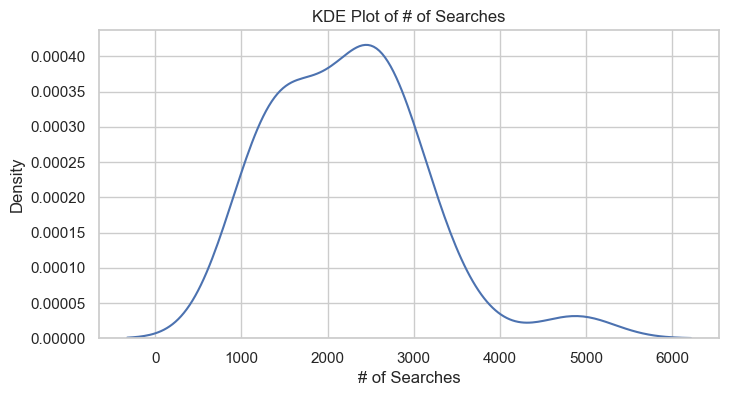

Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное. pvalue = 0.0


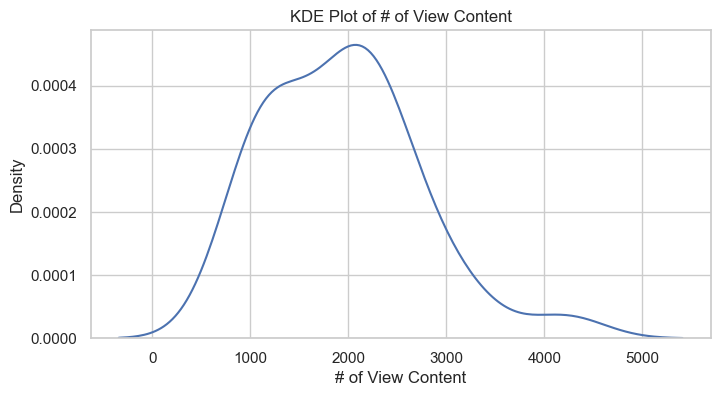

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное. pvalue = 0.0


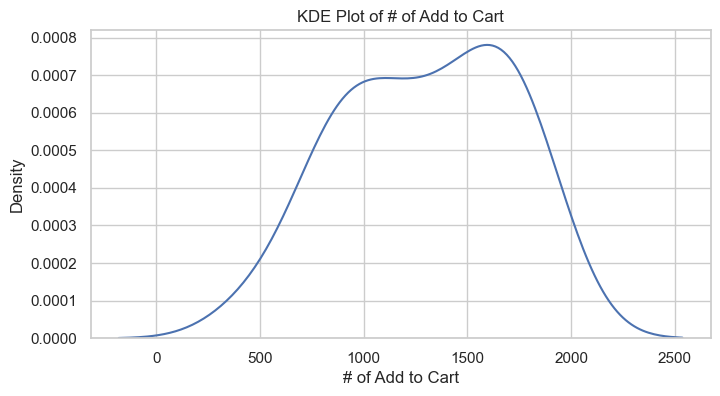

Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное. pvalue = 0.0


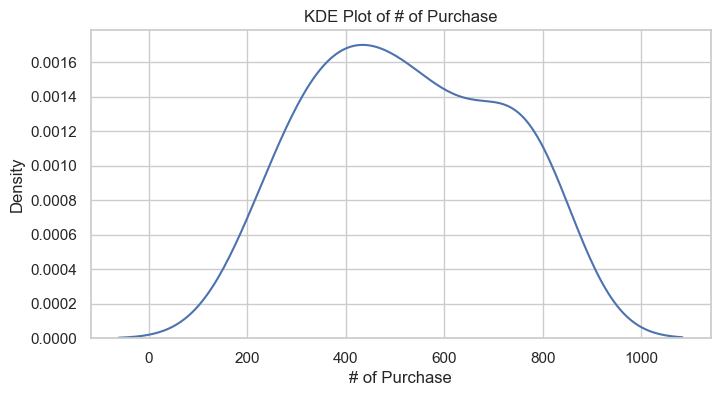

In [20]:
kde_and_ktest(control_df, cut3 = True)


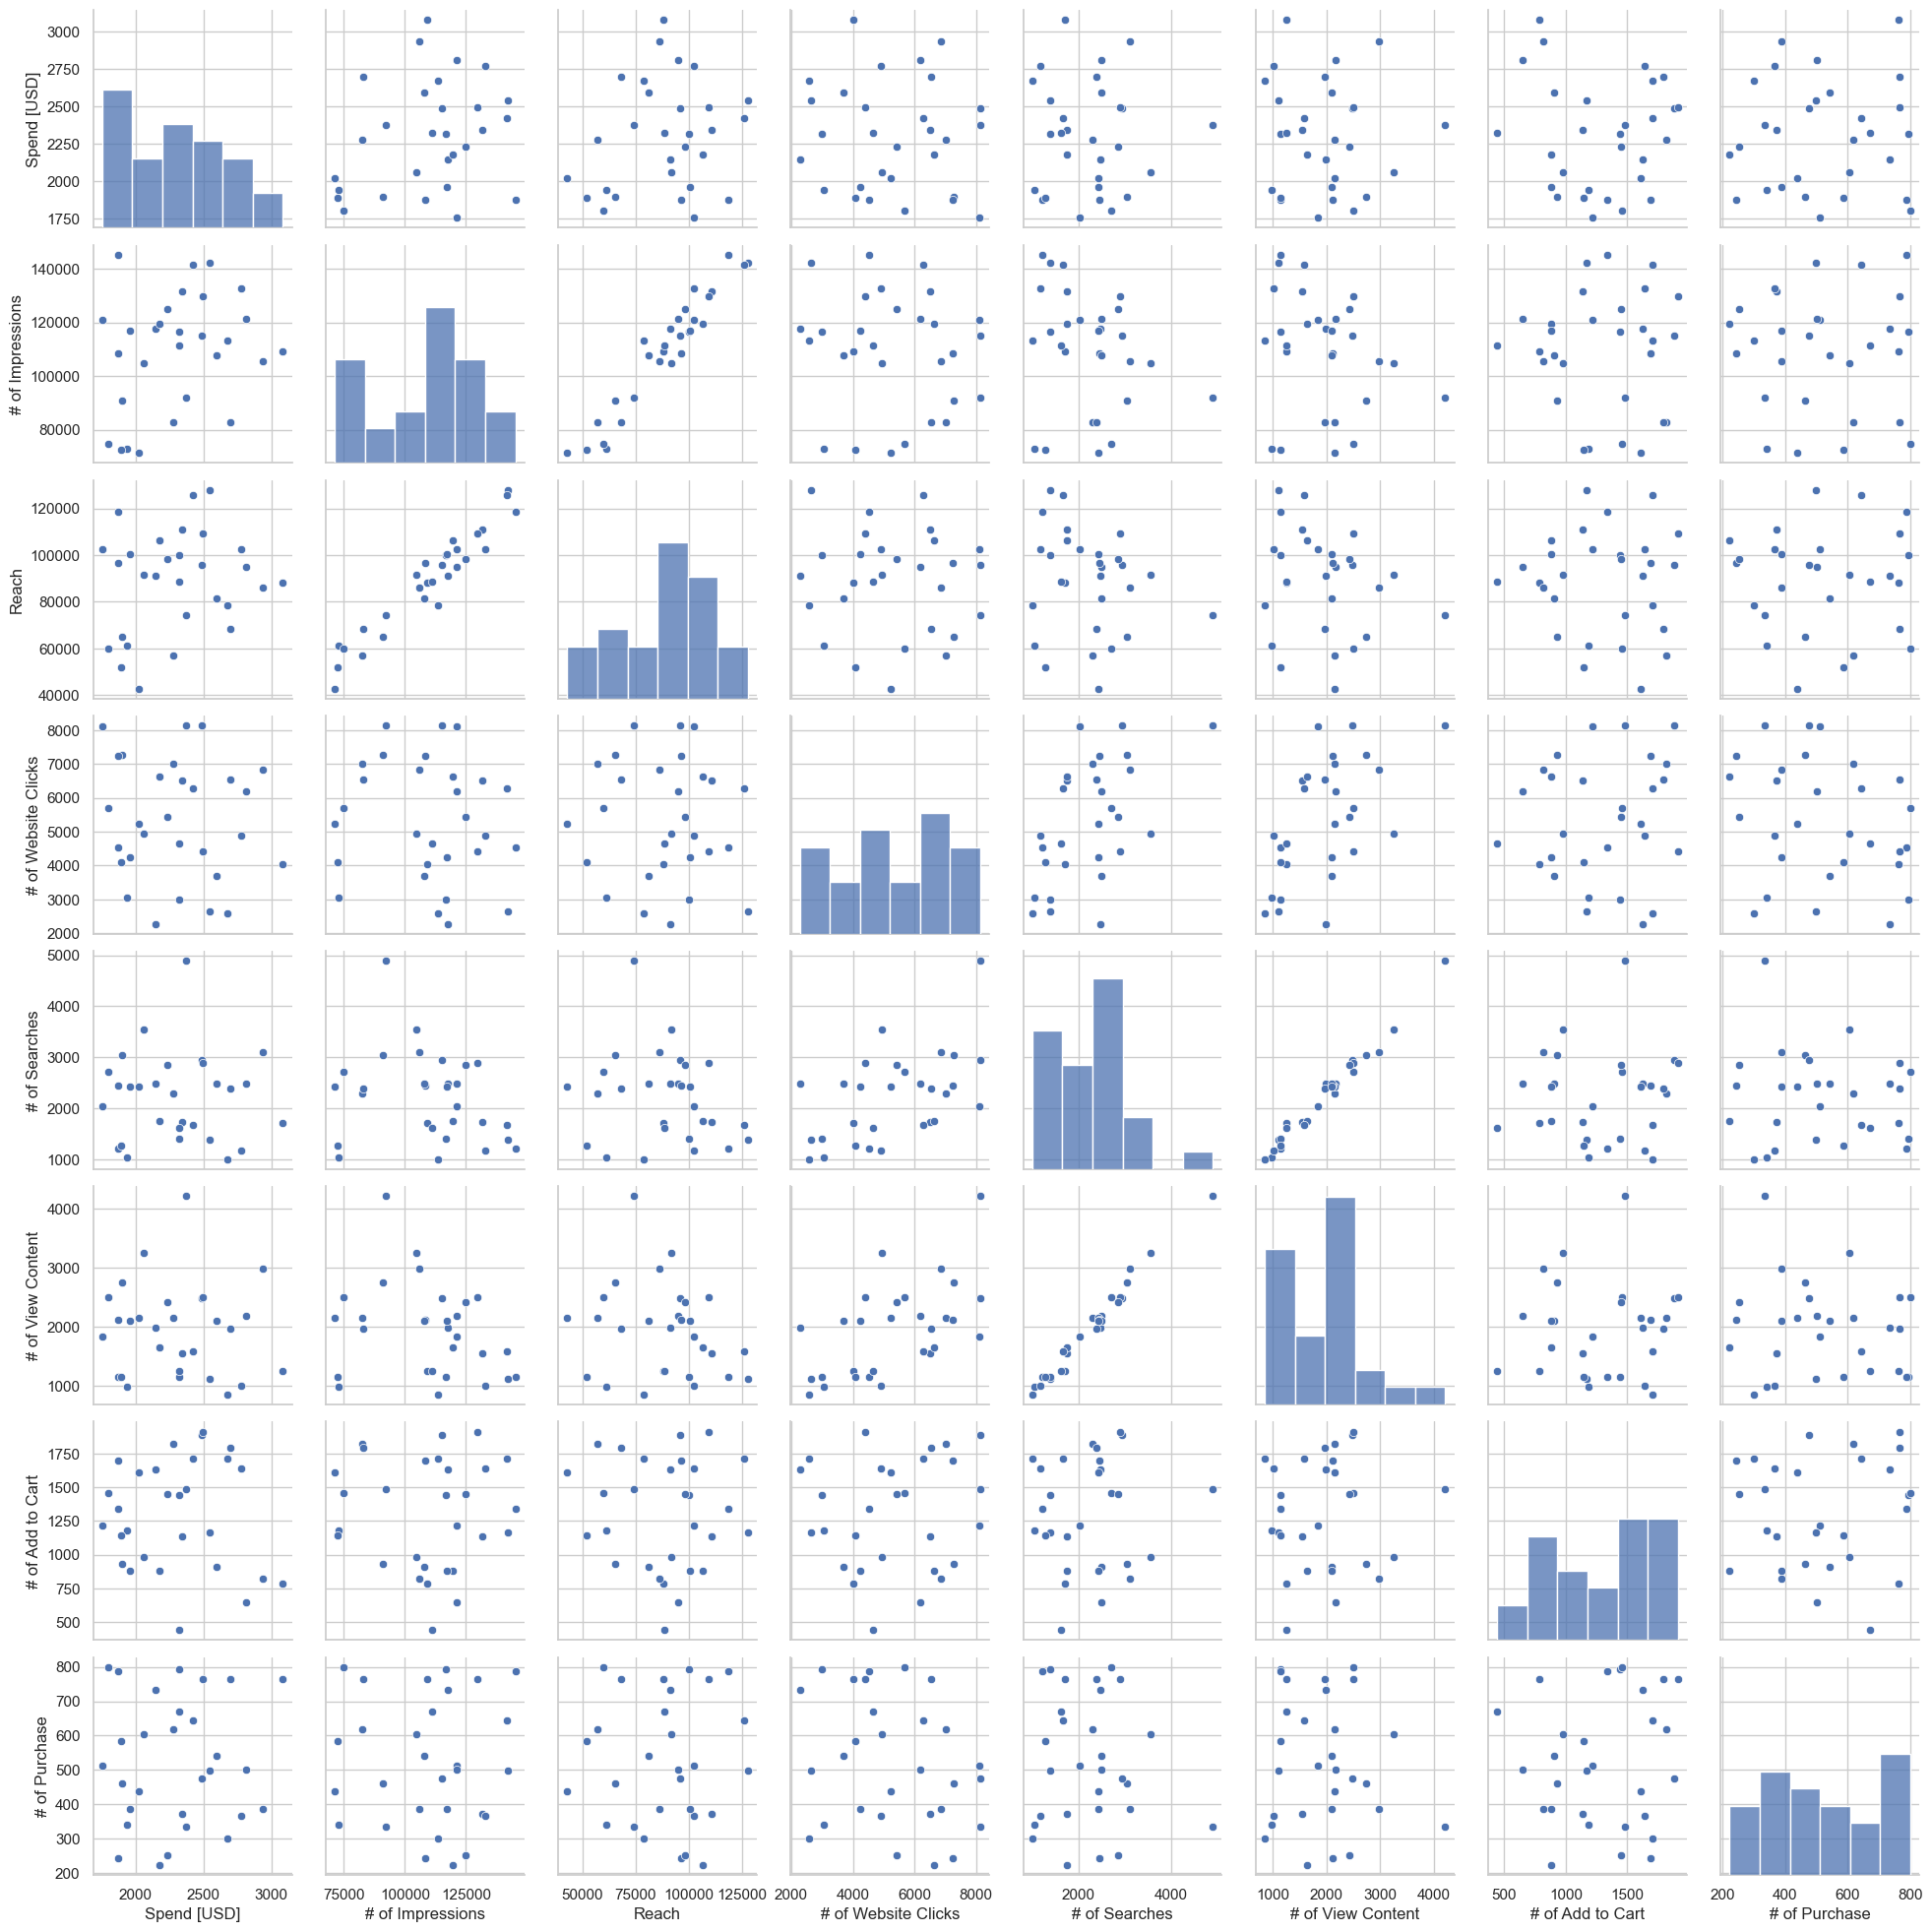

In [21]:
sns.pairplot(control_df)

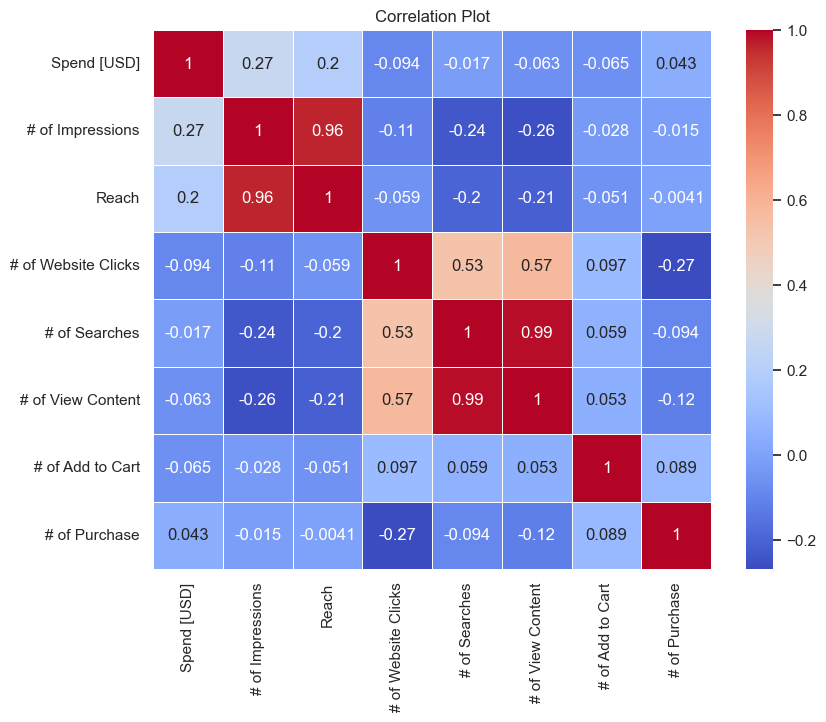

In [22]:
draw_corr_matr(control_df, cut3 = True)

## Создание агрегированных (производных) метрик и их анализ

### test_df

In [23]:
def make_agg_df(df):
    for colname in df.columns[3:]:
        df[f'{colname} per spent dollar'] = df[colname] / df['Spend [USD]']
    return df.copy()

agg_test_df = make_agg_df(test_df)

cut_agg_test_df = agg_test_df.iloc[:,10:].copy()
cut_agg_test_df

,# of Impressions per spent dollar,Reach per spent dollar,# of Website Clicks per spent dollar,# of Searches per spent dollar,# of View Content per spent dollar,# of Add to Cart per spent dollar,# of Purchase per spent dollar
0,13.148271,11.908245,1.009973,0.646941,0.355386,0.297207,0.084774
1,39.621951,35.891424,1.832022,0.928009,0.608969,0.345791,0.266326
2,29.709514,19.111205,3.334038,1.087526,1.000846,0.536152,0.244397
3,28.948708,9.570849,1.555720,0.817712,0.530258,0.208856,0.125461
5,17.365338,12.810822,3.046379,0.754272,0.436534,0.358828,0.198535
6,19.022551,14.851304,1.487315,0.963002,0.768851,0.458421,0.313601
7,11.546296,6.909808,2.463649,0.983196,0.752401,0.425240,0.147805
8,17.161011,11.914781,3.114253,1.093137,1.041101,0.452489,0.318627
9,34.069534,28.541935,2.912186,0.828674,0.646595,0.151971,0.098566
10,34.559091,29.457025,1.549587,1.195455,1.081405,0.444215,0.276033


Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное. pvalue = 1.1861407584919007e-117
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное. pvalue = 2.133879584912577e-25
Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное. pvalue = 8.624889872632448e-17
Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное. pvalue = 4.926930740440786e-12
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное. pvalue = 2.650967706075745e-08
Нельзя сказать, что распределение у данных из колонки '# of Purchase per spent dollar' нормальное. pvalue = 3.5959868001254386e-08


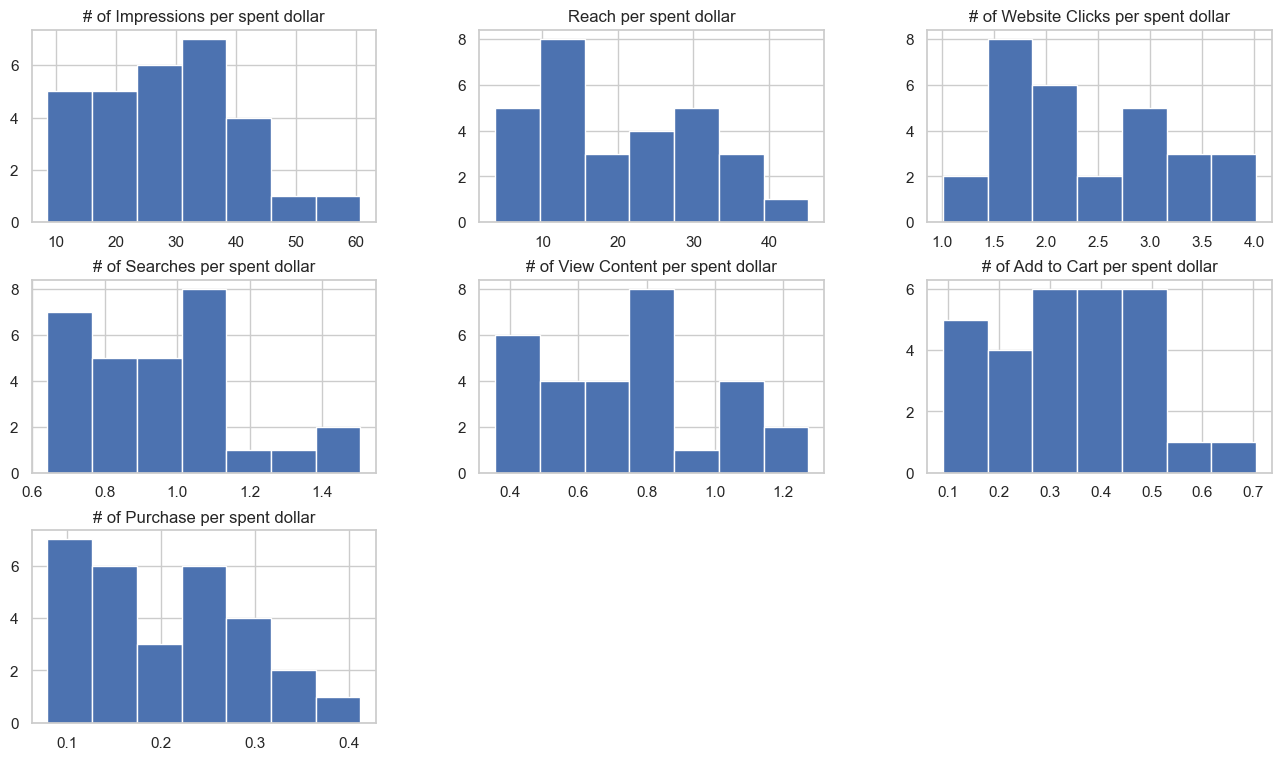

In [24]:
hist_and_ktest(cut_agg_test_df)

Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное. pvalue = 0.0


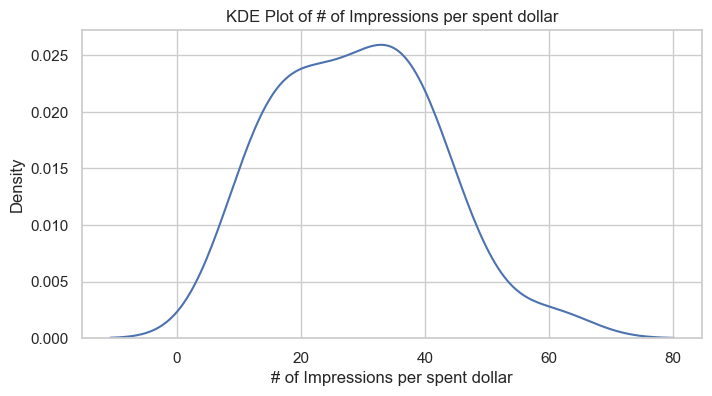

Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное. pvalue = 1.1861407584919007e-117


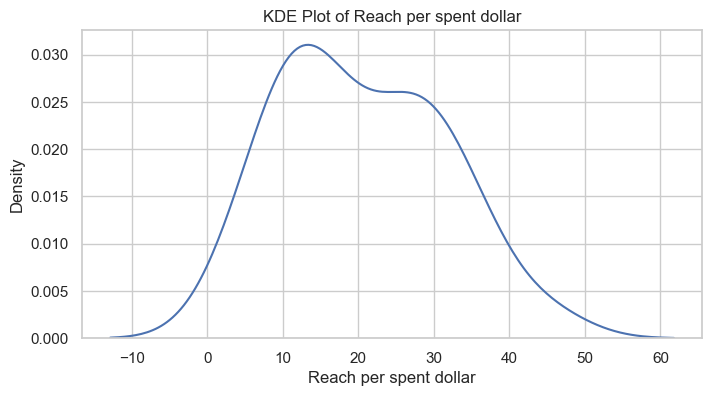

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное. pvalue = 2.133879584912577e-25


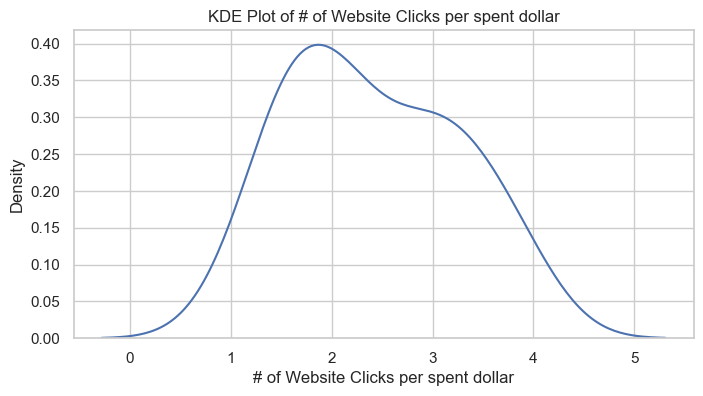

Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное. pvalue = 8.624889872632448e-17


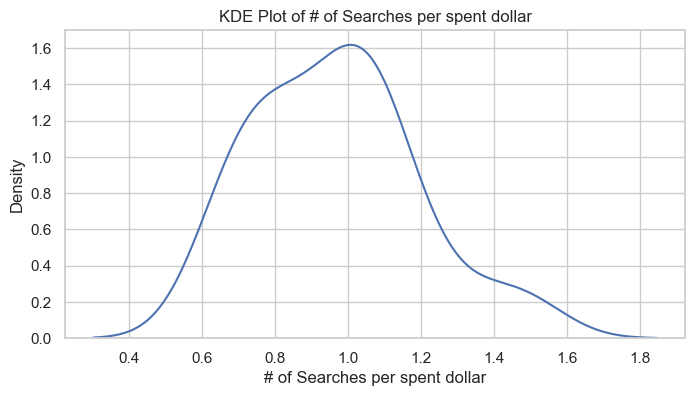

Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное. pvalue = 4.926930740440786e-12


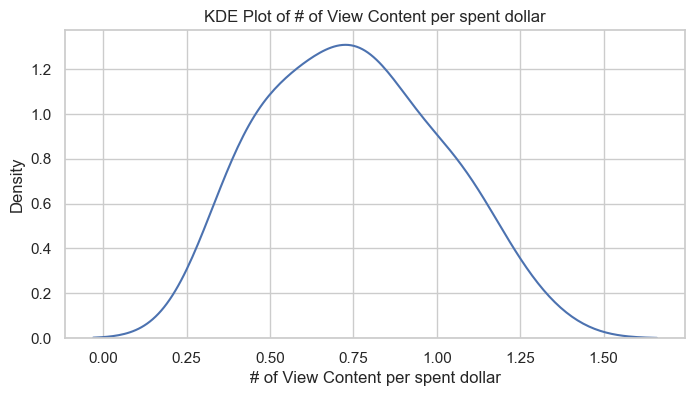

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное. pvalue = 2.650967706075745e-08


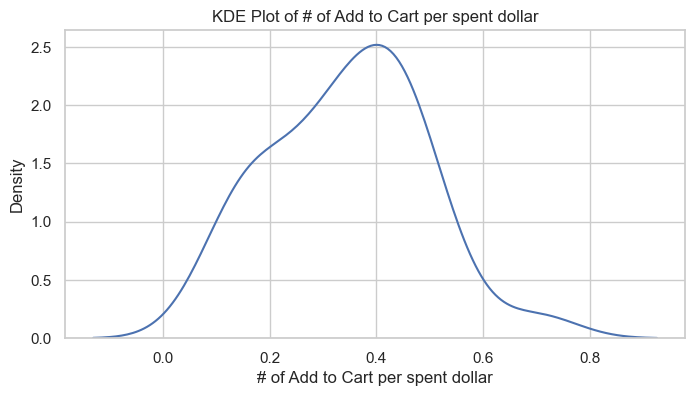

Нельзя сказать, что распределение у данных из колонки '# of Purchase per spent dollar' нормальное. pvalue = 3.5959868001254386e-08


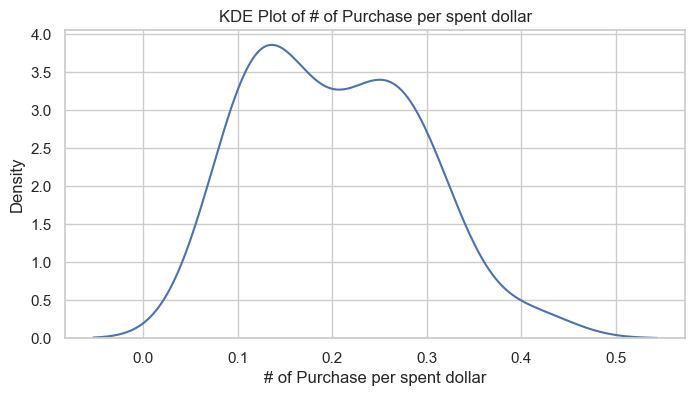

In [25]:
kde_and_ktest(cut_agg_test_df)

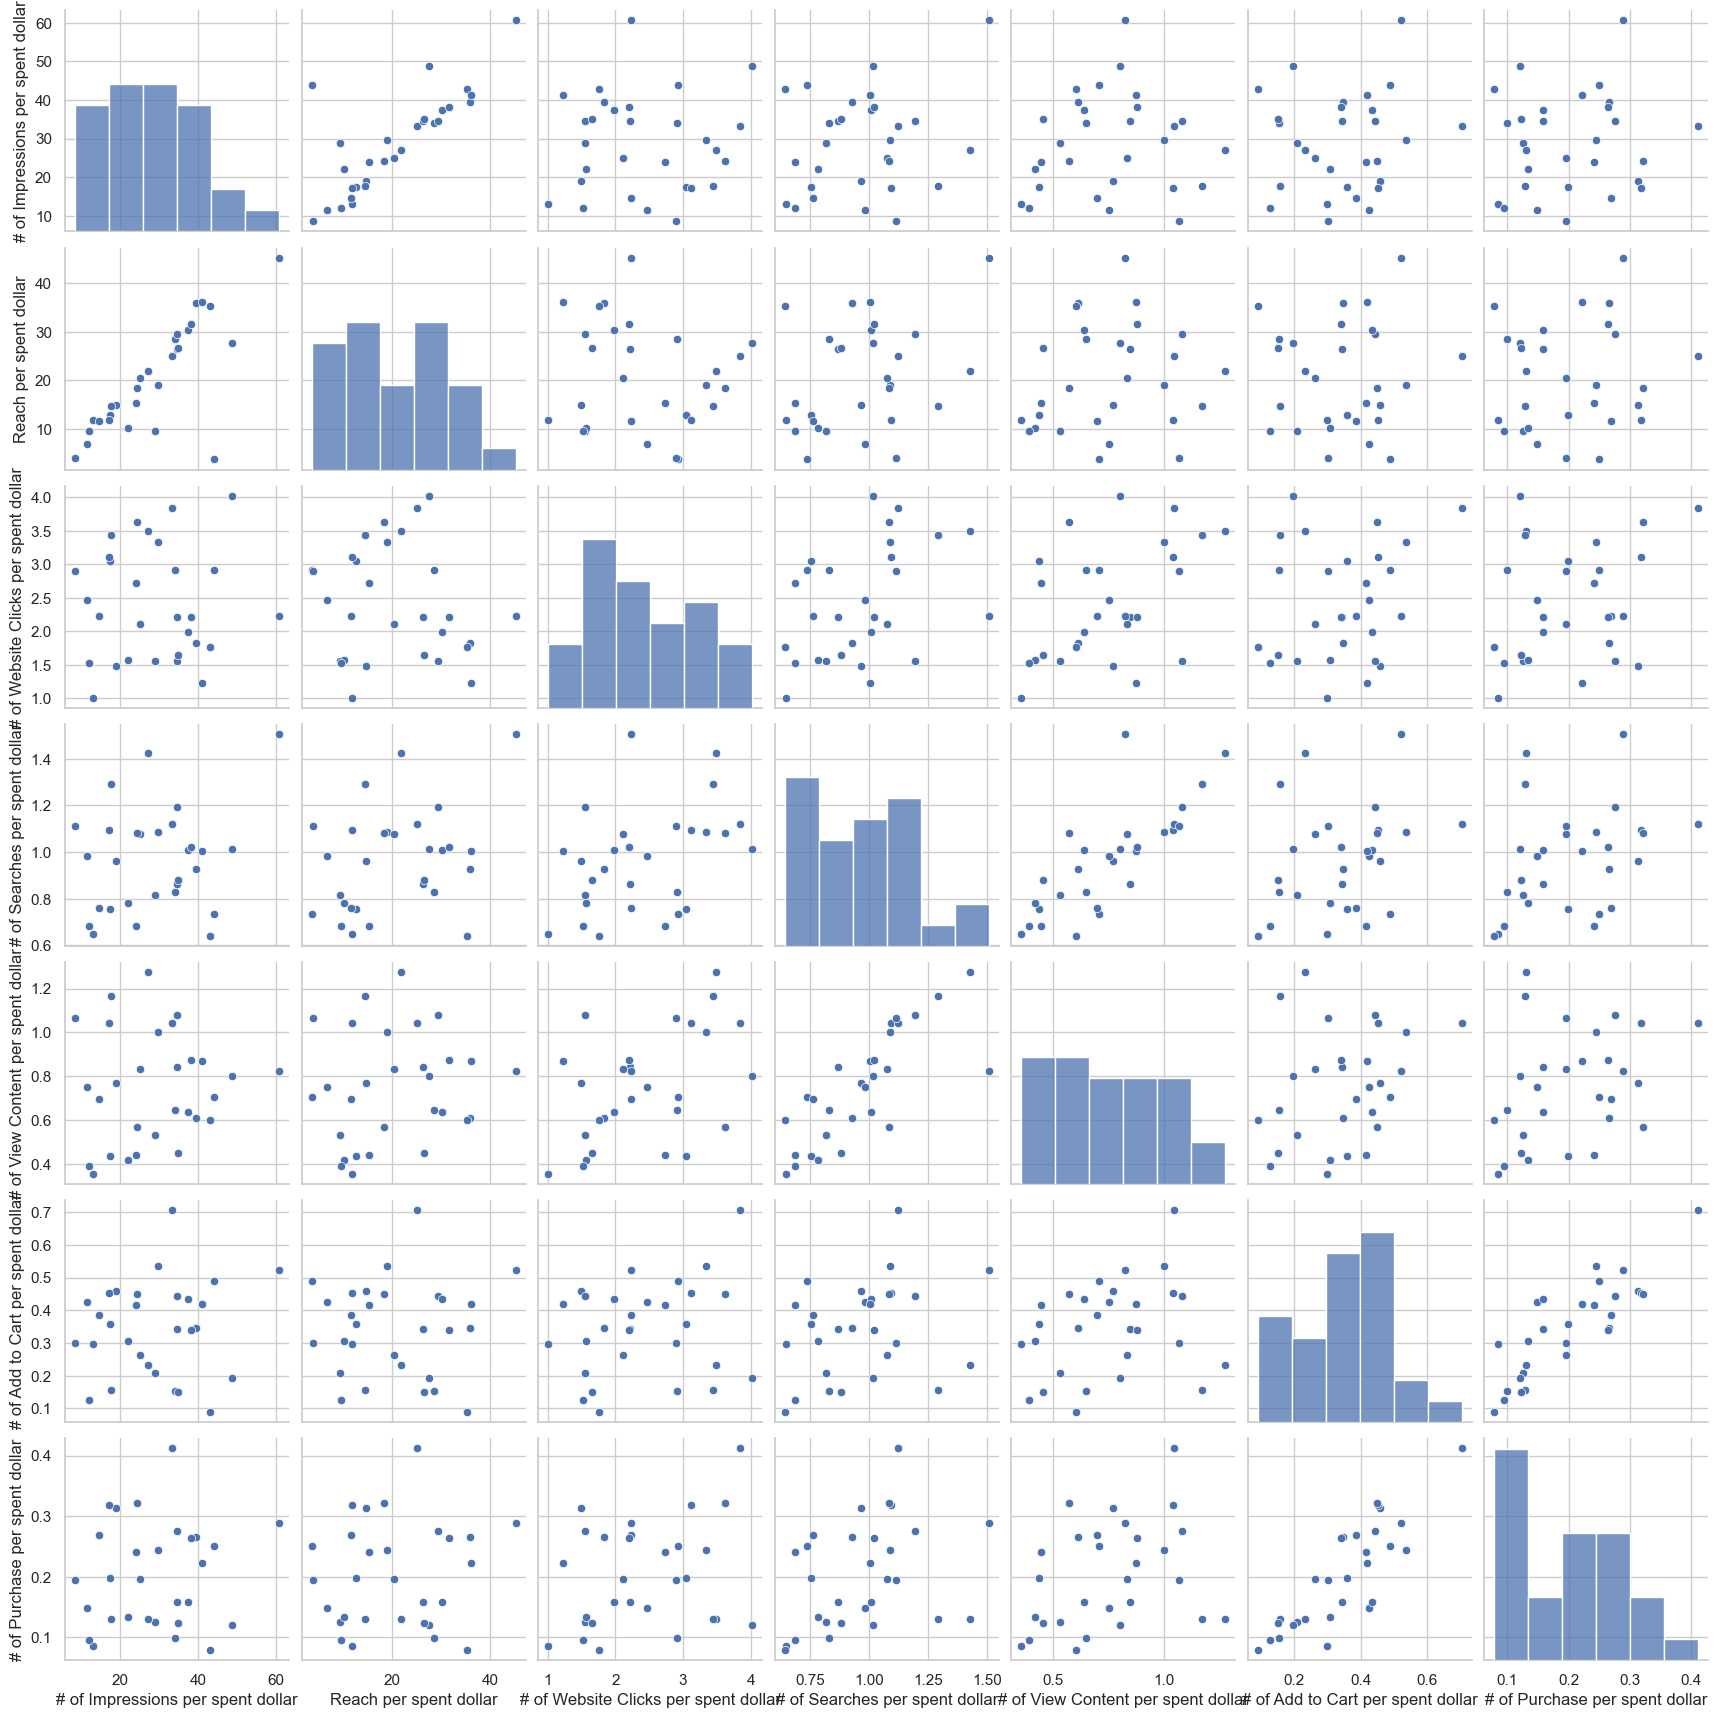

In [26]:
sns.pairplot(
    cut_agg_test_df
)

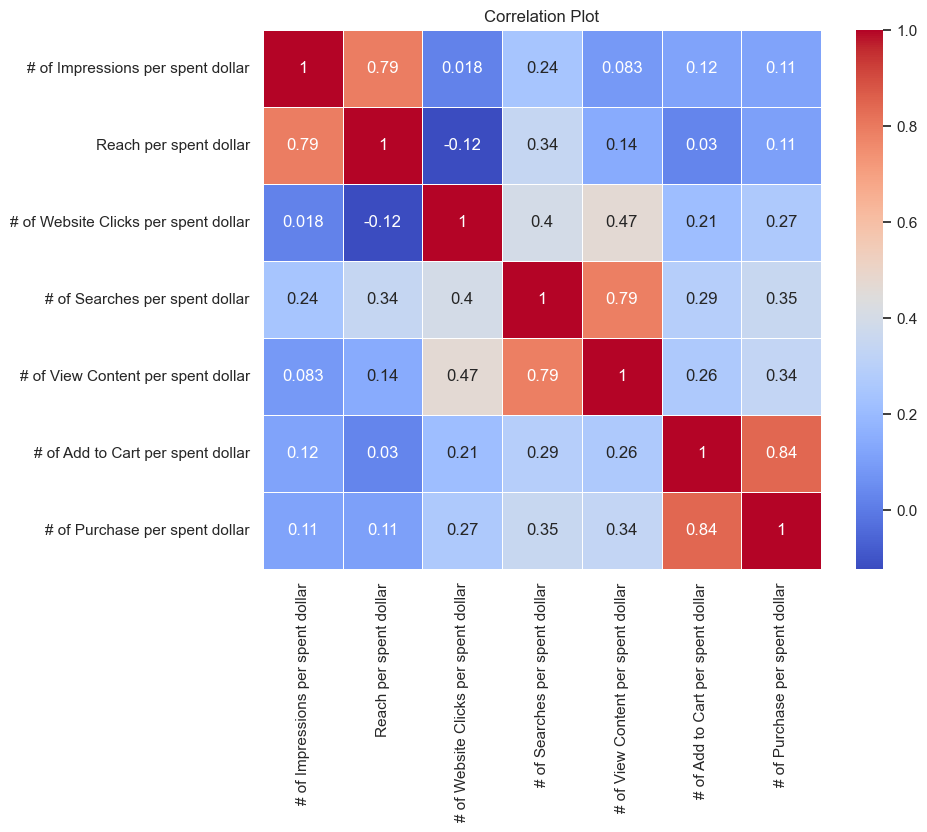

In [27]:
draw_corr_matr(cut_agg_test_df)

### control_df

In [28]:
agg_control_df = make_agg_df(control_df)

cut_agg_control_df = agg_control_df.iloc[:,10:].copy()
cut_agg_control_df

,# of Impressions per spent dollar,Reach per spent dollar,# of Website Clicks per spent dollar,# of Searches per spent dollar,# of View Content per spent dollar,# of Add to Cart per spent dollar,# of Purchase per spent dollar
0,36.272807,24.969298,3.077193,1.004386,0.946930,0.797807,0.271053
1,68.890154,58.345475,4.615822,1.157086,1.047809,0.693796,0.290837
2,56.214682,47.316261,2.777636,0.741357,0.661118,0.483995,0.158771
3,37.565979,31.564433,1.579897,0.537113,0.506186,0.609794,0.175258
5,35.379825,28.542978,1.306520,0.554330,0.405125,0.254298,0.247811
6,55.865959,50.256289,1.037736,0.545597,0.434748,0.458333,0.196148
7,47.862632,34.324737,3.821053,1.603684,1.445263,0.489474,0.243158
8,43.132599,33.734803,2.203342,0.884109,0.774618,0.229293,0.178102
9,54.734295,42.464867,1.059563,1.151698,0.923220,0.758027,0.341554
10,46.283936,38.491165,3.267871,1.181124,0.998394,0.757831,0.190763


Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное. pvalue = 7.861343025602231e-23
Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное. pvalue = 2.5169072895721812e-12
Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное. pvalue = 1.8912070333421152e-11
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное. pvalue = 1.2576865298996521e-09
Нельзя сказать, что распределение у данных из колонки '# of Purchase per spent dollar' нормальное. pvalue = 1.8357672620527876e-08


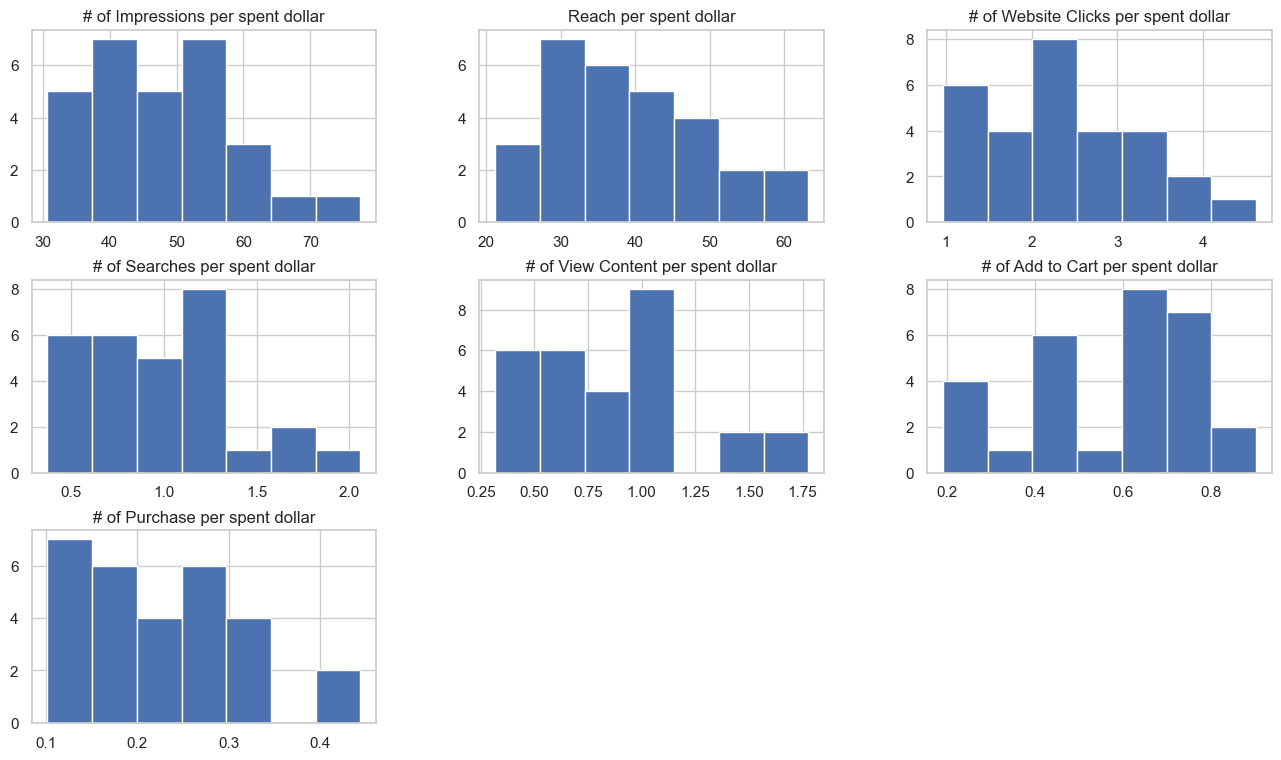

In [29]:
hist_and_ktest(cut_agg_control_df)

Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное. pvalue = 0.0


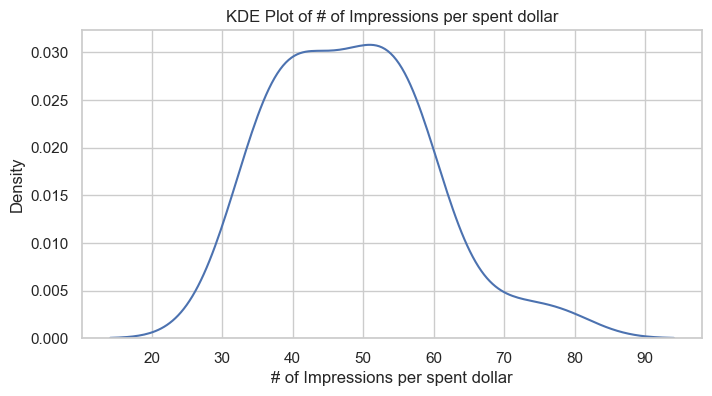

Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное. pvalue = 0.0


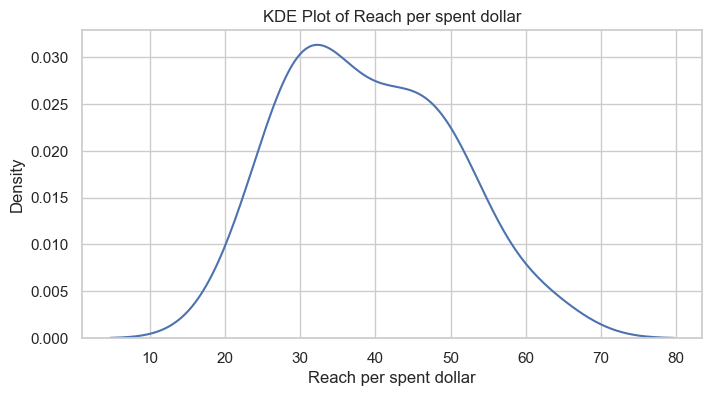

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное. pvalue = 7.861343025602231e-23


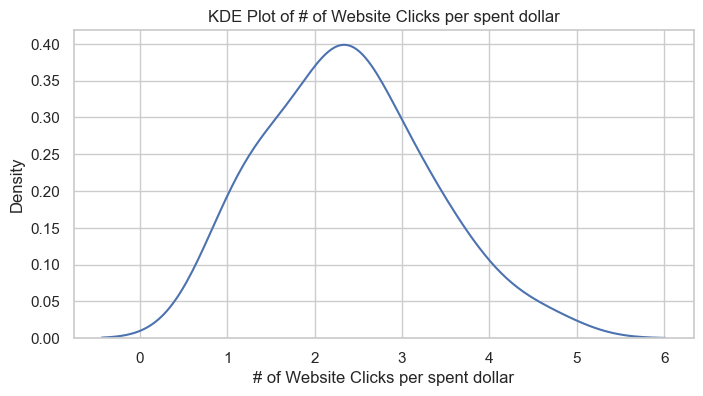

Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное. pvalue = 2.5169072895721812e-12


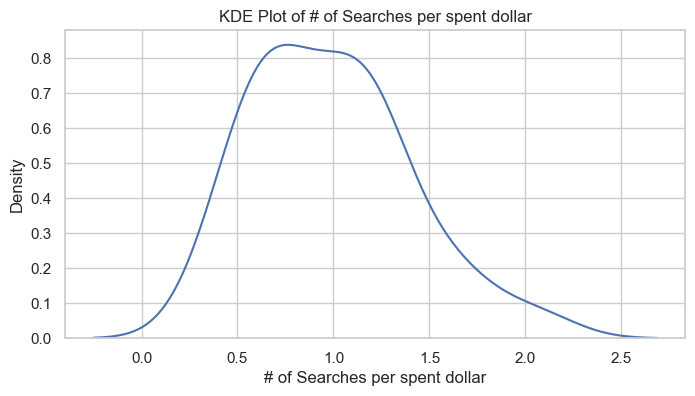

Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное. pvalue = 1.8912070333421152e-11


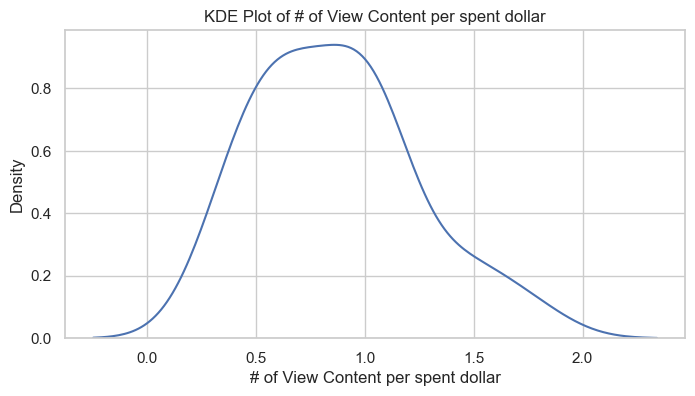

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное. pvalue = 1.2576865298996521e-09


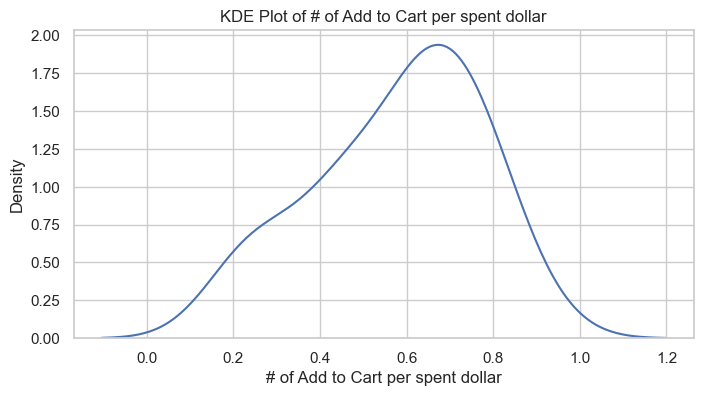

Нельзя сказать, что распределение у данных из колонки '# of Purchase per spent dollar' нормальное. pvalue = 1.8357672620527876e-08


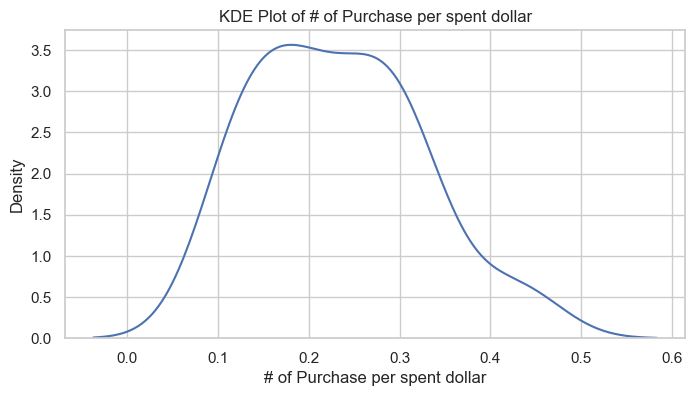

In [30]:
kde_and_ktest(cut_agg_control_df)

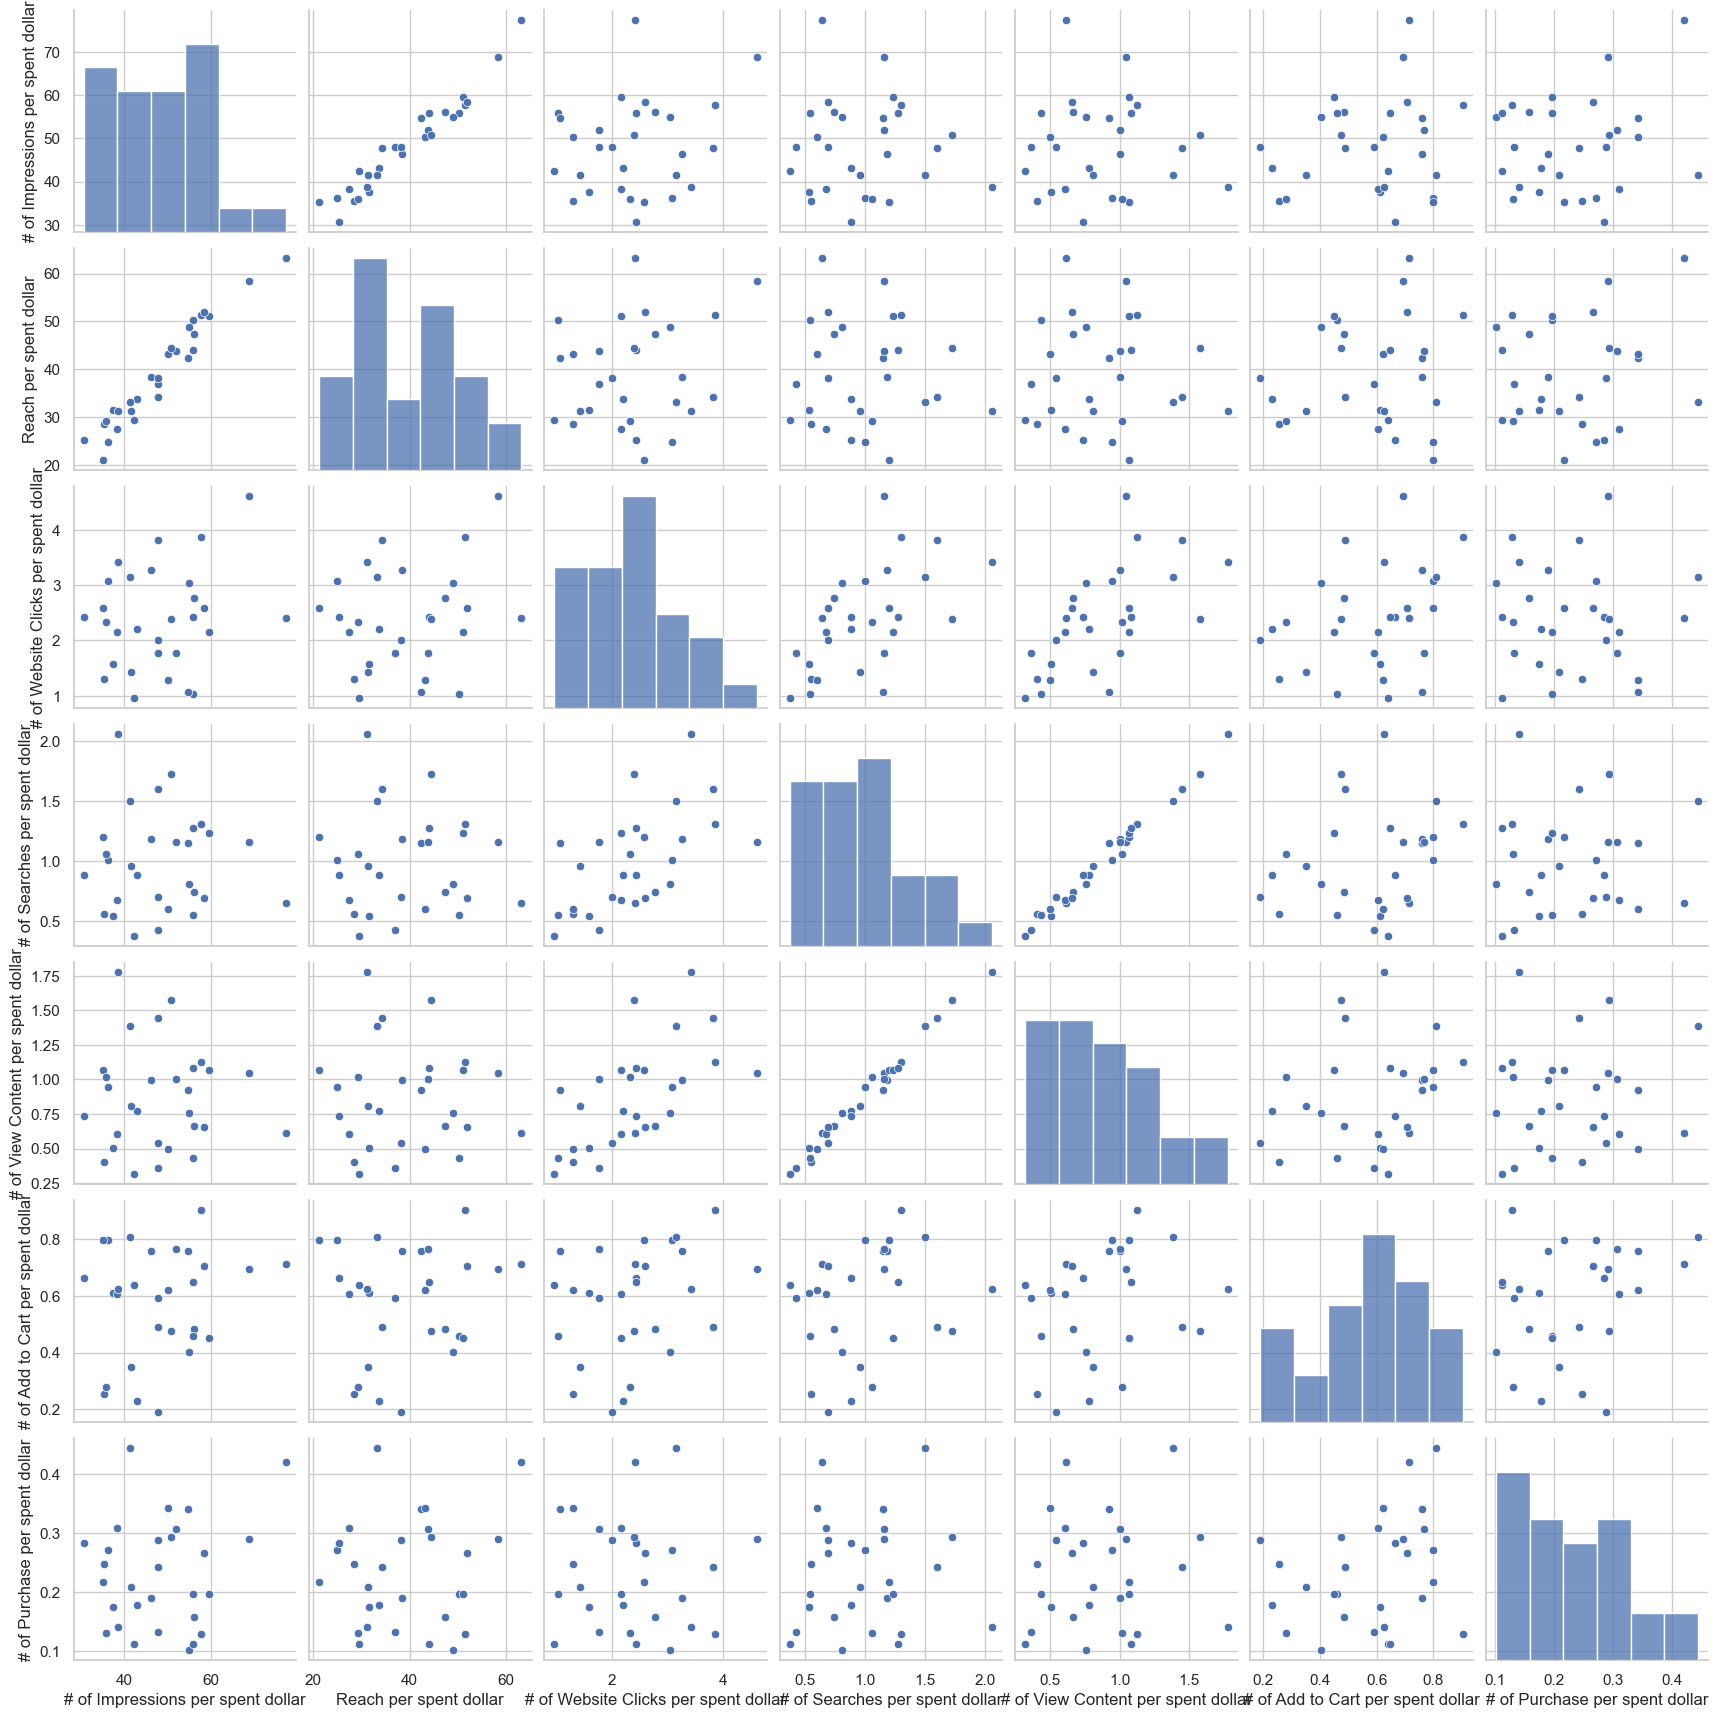

In [31]:
sns.pairplot(
    cut_agg_control_df
)

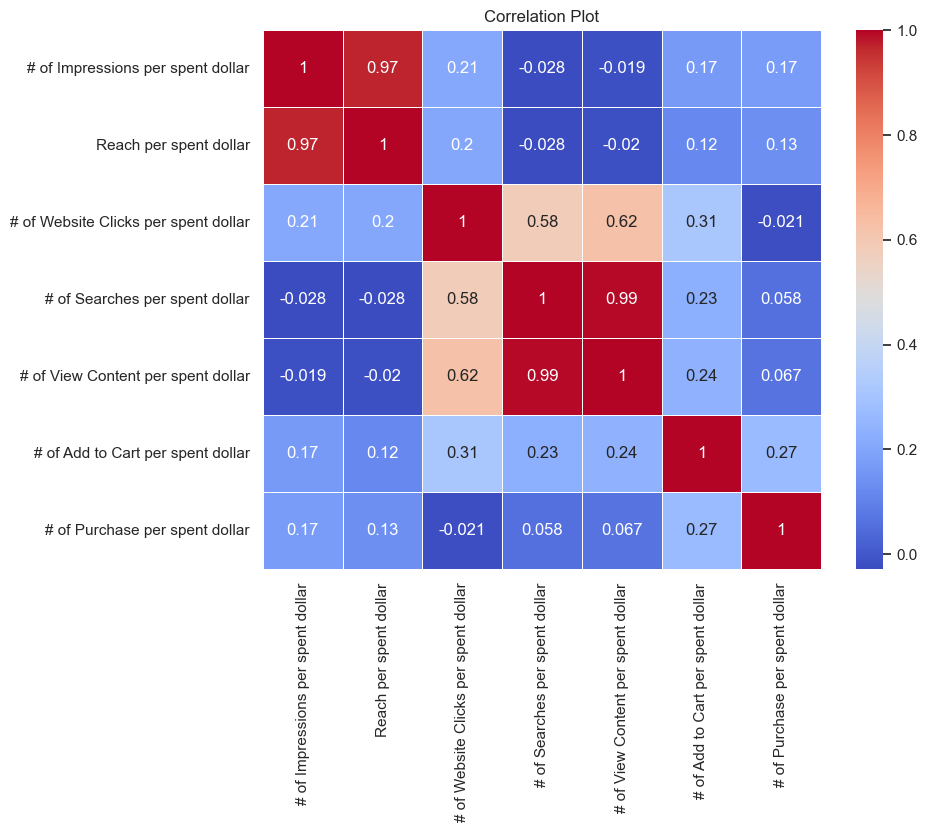

In [32]:
draw_corr_matr(cut_agg_control_df)

Стоит отметить, что итоговый результат по целевой метрике "# of Impressions per spent dollar" в контрольной выборке больше. 

Осталось проверить, статистически ли значимое данное изменение. 

Нельзя сказать, что распределение является нормальным, а значит, вследствие наличия выбросов, стоит использовать непараметрический критерий манна-уитни, который устойчив к выбросам.

In [33]:
cut_agg_test_df['# of Impressions per spent dollar'].sum()

837.0259321840498

In [34]:
cut_agg_control_df['# of Impressions per spent dollar'].sum()

1399.751383983898